In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd

class LogLogRegression:
    """
    This model fits a line to data where both the independent variable (x)
    and the dependent variable (y) are assumed to follow a power-law relationship:
    y = a * x^b, which becomes linear after taking logarithms:
    log(y) = log(a) + b * log(x)
    """


    def __init__(self):

        self.bias = 0 # Starts at 0
        self.best_mse = float('inf')
        self.no_improve_count = 0
        self.exponents = None # These will add non-linearity to the model
        self.epsilon = 1e-8 # To make sure that values are not going to return a math domain error when taking the log of X
    
    def train(self, X, y, epochs=200, alpha=0.01, exponent_alpha=0.0001):

        """
        Training the model using gradient descent
        Accepts the features (X) and the target values (y)
        """

        if isinstance(X, pd.Series):
            X = X.values.reshape(-1, 1)

        else:
            X = X.values  # (m, n_features)

        y = y.values.reshape(-1, 1)  # (m, 1) always

        
        self.X = np.log(X) 
        self.y = np.log(y)

        if type(self.X) == pd.Series:

            self.amount_of_features = 1
        else:

            self.amount_of_features = self.X.shape[1] # Amount of features is the amount of weights and biases
        
        print("Training started...")
        print("X shape:", X.shape)

        self.exponents = np.random.uniform(1, 4.0, self.amount_of_features)
        print(f"Exponents initialized: {self.exponents}")

        self.weights = np.random.randn(self.amount_of_features, 1)  # shape (n_features,1)
        print("Weights initialized:", self.weights.shape)

        self.m = self.X.shape[0]
        
        for epoch in range(epochs+1):
            self.predictions = self.exponents * self.X + self.bias    # shape (m,1)
            self.error = self.predictions - self.y                   # shape (m,1)

            gradient_e = (2/self.m) * np.sum(self.error * self.X, axis=0)         
            gradient_b = (2/self.m) * np.sum(self.error)                 

            self.exponents -= exponent_alpha * gradient_e
            self.bias -= alpha * gradient_b

            self.exponents = np.clip(self.exponents, 0.3, 3.0)

            self.mse = np.mean(self.error ** 2)
                    # print(self.mse)

            # Checks to see if the model has not improved in 10 epochs, if it has not, it breaks the training process
            if self.mse < self.best_mse:

                self.best_mse = self.mse
                self.no_improve_count = 0

            else:

                self.no_improve_count +=1

            if self.no_improve_count == 10:

                print("Model has stopped improving. \nStopping training now.")
                break

            print(f"Epoch {epoch}: mse: {self.mse}, exponents: {self.exponents}, bias: {self.bias}")
            print("\n\n\n")
            
        print("\n\n")
        print(f"Bias: {self.bias}")
        print(f"Exponents: {self.exponents}")
        print(f"MSE: {self.mse}")

    def predict(self, inputs):
        inputs = np.log(np.abs(inputs) + self.epsilon)
        preds_log = self.exponents * inputs + self.bias
        return np.exp(preds_log)


In [3]:
# Set default figure size for all plots (width, height) in inches
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [5]:
model = LogLogRegression()

In [6]:
np.random.seed(42)  # for reproducibility

# Generate 100 data points between 1 and 10
X = np.linspace(1, 250, 100)

# Create y with a nonlinear relationship + some noise
noise = np.random.normal(0, 10, size=X.shape)
y = 5 * X**2 - 5 * X + 22 + noise

# Put it into a DataFrame for convenience
data = pd.DataFrame({'X': X, 'y': y})

data

,X,y
0,1.000000,26.967142
1,3.515152,64.823050
2,6.030303,180.148143
3,8.545455,359.626993
4,11.060606,576.040468
...,...,...
95,239.939394,286662.231701
96,242.454545,292733.721533
97,244.969697,298850.524235
98,247.484848,305028.378040


In [7]:
data.describe()

,X,y
count,100.000000,100.000000
mean,125.500000,104500.355474
std,72.968298,94236.792504
min,1.000000,26.967142
25%,63.250000,19713.964076
50%,125.500000,78146.462703
75%,187.750000,175321.899781
max,250.000000,311269.654129


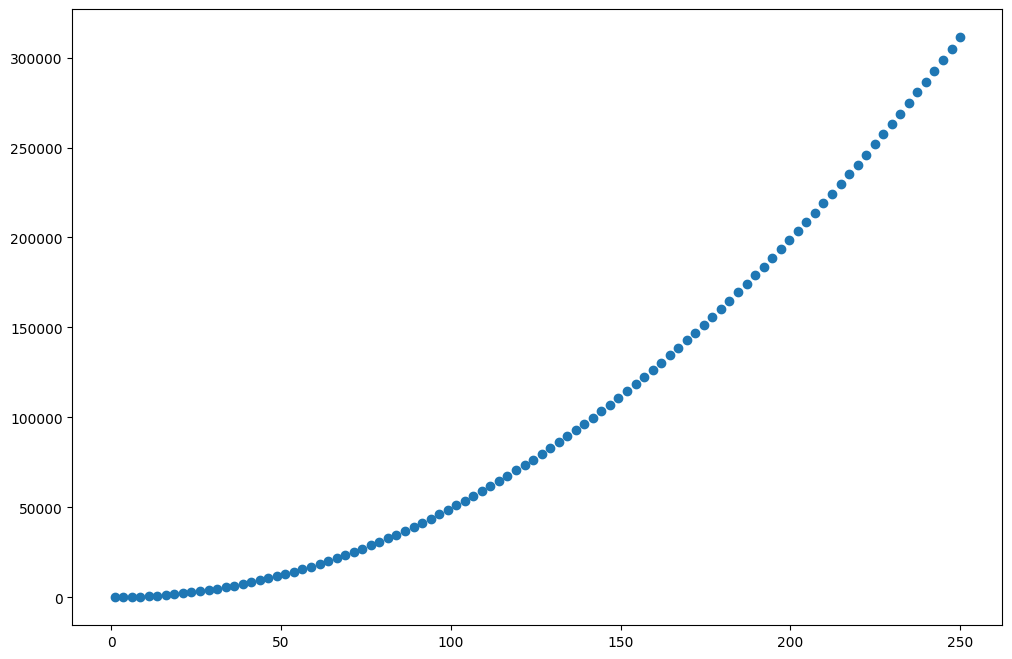

In [8]:
plt.scatter(data['X'], data['y'])
plt.show()


In [9]:
model.train(X=data['X'], y=data['y'])

Training started...
X shape: (100, 1)
Exponents initialized: [2.25223301]
Weights initialized: (1, 1)
Epoch 0: mse: 0.3526022990723135, exponents: [2.25259762], bias: 0.009482106943889552




Epoch 1: mse: 0.342405912298075, exponents: [2.25295208], bias: 0.018741582355626278




Epoch 2: mse: 0.33269380241810714, exponents: [2.25329665], bias: 0.027783796692009623




Epoch 3: mse: 0.3234428834770264, exponents: [2.25363155], bias: 0.036613990836106246




Epoch 4: mse: 0.31463117007778435, exponents: [2.25395703], bias: 0.04523727922349701




Epoch 5: mse: 0.3062377249156091, exponents: [2.25427331], bias: 0.05365865289309623




Epoch 6: mse: 0.29824260881313724, exponents: [2.25458061], bias: 0.06188298246436349




Epoch 7: mse: 0.2906268331374693, exponents: [2.25487916], bias: 0.06991502104268367




Epoch 8: mse: 0.2833723144856171, exponents: [2.25516915], bias: 0.07775940705464846




Epoch 9: mse: 0.2764618315301915, exponents: [2.2554508], bias: 0.08542066701493051




Epo

In [10]:
preds = model.predict(data['X'])

In [11]:
preds

0          1.537657
1         26.292751
2         88.961285
3        195.487261
4        350.075322
          ...      
95    364882.715204
96    373577.928869
97    382387.399864
98    391311.433333
99    400350.332105
Name: X, Length: 100, dtype: float64

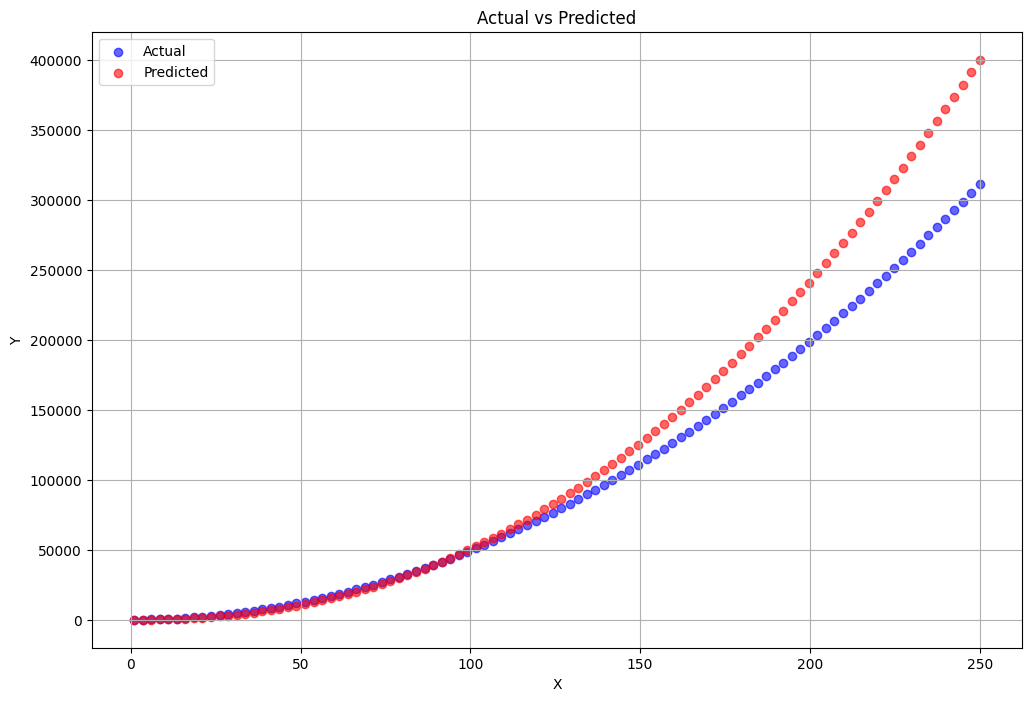

In [12]:
# Actual data points
plt.scatter(data['X'], data['y'], label='Actual', color='blue', alpha=0.6)

# Predicted values
plt.scatter(data['X'], preds, label='Predicted', color='red', alpha=0.6)

plt.title("Actual vs Predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()
